# CREDIT CARD FRAUD DETECTION USING DEEP LEARNING

# Problem Statement:
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

In the banking industry, credit card fraud detection using deep learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Deep learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

In this project we will detect fraudulent credit card transactions with the help of Deep learning technique. 

# Data Understanding :
The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

In [7]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as roc
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [8]:
#import the dataset and visualize the dataset
dataset = pd.read_csv('D:\dl project\creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

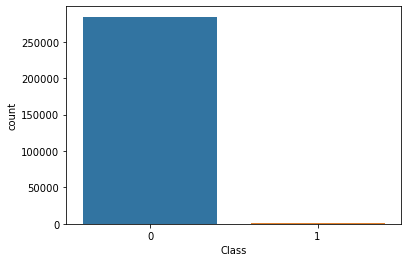

In [10]:
#visualize the target class 'Class'
sns.countplot(x='Class', data=dataset)

In [11]:
#seperating positive and negative classes
positiveDataset = dataset.loc[dataset['Class'] == 1]
negativeDataset = dataset.loc[dataset['Class'] == 0]

In [12]:
#creating training and testing set with negative class split 1:1 and positive class split 4:1, also keeping random_state constant so that all splits are same
positiveTrain, positiveTest = tts(positiveDataset, test_size=0.2, random_state=21)
negativeTrain, negativeTest = tts(negativeDataset, test_size=0.5)
trainDataset = positiveTrain.append(negativeTrain)
testDataset = positiveTest.append(negativeTest)

C:\Users\prani\AppData\Local\Temp\ipykernel_3104\3360441513.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainDataset = positiveTrain.append(negativeTrain)
C:\Users\prani\AppData\Local\Temp\ipykernel_3104\3360441513.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testDataset = positiveTest.append(negativeTest)


In [13]:
#create classifier
def classifierCreator():
    clf = keras.models.Sequential()
    clf.add(keras.layers.Dense(10, activation='relu'))
    clf.add(keras.layers.Dense(5, activation='relu'))
    clf.add(keras.layers.Dense(1, activation='sigmoid'))
    return clf

In [14]:
#create Classifier object and scale the dataset
classifier = classifierCreator()
classifier.compile(loss='binary_crossentropy', optimizer='sgd')
yTrain = trainDataset['Class']
yTest = testDataset['Class']
xTrain = trainDataset.drop(columns=['Class'])
xTest = testDataset.drop(columns=['Class'])
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [15]:
#fit the dataset to the train values
weights = {0:1, 1:1.5}
history = classifier.fit(xTrain, yTrain, class_weight=weights, epochs=15, verbose=0)

In [16]:
#predict the model on the train values and check results
#predTrain = classifier.predict_class(xTrain)
predTrain = (classifier.predict(xTrain) > 0.5).astype("int32")

4455/4455 [==============================] - 3s 621us/step


In [17]:
print(classification_report(yTrain, predTrain))
print('ROC AUC Score: ',roc(yTrain, predTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142157
           1       0.88      0.80      0.84       393

    accuracy                           1.00    142550
   macro avg       0.94      0.90      0.92    142550
weighted avg       1.00      1.00      1.00    142550

ROC AUC Score:  0.899346887390265


In [18]:
#predict test values and check results
#predTest = classifier.predict(xTest)
predTest = (classifier.predict(xTest) > 0.5).astype("int32")
print(classification_report(yTest, predTest))
print('ROC AUC Score: ',roc(yTest, predTest))

4446/4446 [==============================] - 3s 595us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.71      0.80      0.75        99

    accuracy                           1.00    142257
   macro avg       0.85      0.90      0.87    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.8988738309529261


In [19]:
#finding the best weight ratio
for i in range(1, 10, 1):
    print('Ratio of weights: 1:',1+(i*0.01))
    classifier = classifierCreator()
    classifier.compile(loss='binary_crossentropy', optimizer='sgd')
    weights = {0:1, 1:1+(i*0.01)}
    history = classifier.fit(xTrain, yTrain, class_weight=weights, epochs=15, verbose=0)
    #predict the model on the train values and check results
    #predTrain = classifier.predict_classes(xTrain)
    predTrain = (classifier.predict(xTrain) > 0.5).astype("int32")
    print(classification_report(yTrain, predTrain))
    print('ROC AUC Score: ',roc(yTrain, predTrain))
    #predict test values and check results
    #predTest = classifier.predict_classes(xTest)
    predTest = (classifier.predict(xTest) > 0.5).astype("int32")
    print(classification_report(yTest, predTest))
    print('ROC AUC Score: ',roc(yTest, predTest))

Ratio of weights: 1: 1.01
4455/4455 [==============================] - 3s 577us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142157
           1       0.89      0.75      0.81       393

    accuracy                           1.00    142550
   macro avg       0.94      0.87      0.91    142550
weighted avg       1.00      1.00      1.00    142550

ROC AUC Score:  0.8739156637213334
4446/4446 [==============================] - 3s 572us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.71      0.74      0.72        99

    accuracy                           1.00    142257
   macro avg       0.85      0.87      0.86    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.8685813522896205
Ratio of weights: 1: 1.02
4455/4455 [==============================] - 3s 580us/step
              precision    recall  f1-score   s

C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4446/4446 [==============================] - 3s 576us/step


C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.00      0.00      0.00        99

    accuracy                           1.00    142257
   macro avg       0.50      0.50      0.50    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.5
Ratio of weights: 1: 1.05
4455/4455 [==============================] - 3s 647us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142157
           1       0.91      0.77      0.83       393

    accuracy                           1.00    142550
   macro avg       0.96      0.88      0.92    142550
weighted avg       1.00      1.00      1.00    142550

ROC AUC Score:  0.8828531712804863
4446/4446 [==============================] - 3s 598us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.77      0.80     

C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4446/4446 [==============================] - 3s 572us/step


C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.00      0.00      0.00        99

    accuracy                           1.00    142257
   macro avg       0.50      0.50      0.50    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.5
Ratio of weights: 1: 1.09
4455/4455 [==============================] - 2s 549us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142157
           1       0.90      0.73      0.81       393

    accuracy                           1.00    142550
   macro avg       0.95      0.87      0.90    142550
weighted avg       1.00      1.00      1.00    142550

ROC AUC Score:  0.865023880255964
4446/4446 [==============================] - 2s 557us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.72      0.77      